# Pandas - Data manipulations

This notebook is the third part of the collection devoted to the pandas library.

In [1]:
# Necesssary import evil

import jupy_helpers
import pandas as pd
import numpy as np
from IPython.display import display, HTML, IFrame

np.random.seed(42)

In [2]:
%matplotlib inline  
# This will enable us to see plots embedded in the notebook

In [3]:
# make the cells wide
display(HTML("<style>.container { width:95% !important; }</style>"))

In the previous notebook, we imported data from several data formats.
Let's start from there and see what basic manipulations we can do
with the DataFrames.

In [4]:
con = 'sqlite:///./workshop_data.sqlite'

In [5]:
# Read the data that we stored in the previous example
imdb_titles = pd.read_sql('imdb_titles', con)
imdb_ratings = pd.read_sql('imdb_ratings', con)
boxoffice = pd.read_sql('boxoffice', con)
rotten_tomatoes = pd.read_sql("rotten_tomatoes", con)

In [1]:
# alternative for Binder

# imdb_titles = pd.read_csv('../data/title.basics.tsv.gz', sep='\t', na_values="\\N"),
# imdb_ratings = pd.read_csv('../data/title.ratings.tsv.gz', sep='\t', na_values="\\N"),
# boxoffice = pd.read_csv('../data/boxoffice_march_2019.csv.gz'),
# rotten_tomatoes = pd.read_csv("../data/rotten_tomatoes_top_movies_2019-01-15.csv"),
# awards = pd.read_sql("awards", con='sqlite:///../data/awards.sqlite')

## First look at the data

Let's see what we have in the datasets...

In [6]:
imdb_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,NaN,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1.0,"Comedy,Short"


In [7]:
imdb_titles.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1783511,tt9916734,video,Manca: Peleo,Manca: Peleo,0,2018.0,NaN,NaN,"Music,Short"
1783512,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013.0,NaN,NaN,Documentary
1783513,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019.0,NaN,NaN,Short
1783514,tt9916764,short,38,38,0,2018.0,NaN,NaN,Short
1783515,tt9916856,short,The Wind,The Wind,0,2015.0,NaN,27.0,Short


For an unknown, potentially unevenly distributed dataset, looking at the beginning / end is typically not the best idea. We'd rather sample randomly:

In [8]:
# Show a few examples
imdb_titles.sample(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
819942,tt1991254,tvMovie,Wolf in a Holy Place: The Varg Veum Story,Wolf in a Holy Place: The Varg Veum Story,0,2010.0,NaN,15.0,Documentary
1274430,tt5089748,short,Hyacinthe,Hyacinthe,0,1936.0,NaN,35.0,"Comedy,Short"
201491,tt0213393,short,The Abduction of Pinkie,The Abduction of Pinkie,0,1913.0,NaN,NaN,"Comedy,Short"
685127,tt1528778,video,La vida del tahur,La vida del tahur,0,2006.0,NaN,88.0,Action
1445211,tt6448120,movie,Hutushenpan,Hutushenpan,0,2008.0,NaN,NaN,None
882336,tt2233608,short,The Laughing Club,The Laughing Club,0,2012.0,NaN,11.0,"Biography,Comedy,Documentary"
1077437,tt3548134,short,The Yellow Sky,The Yellow Sky,0,2014.0,NaN,15.0,"Drama,Short"
1573011,tt7624254,tvSeries,Regent's & Vicky (AKA Cheek by Jowl),Regent's & Vicky (AKA Cheek by Jowl),0,NaN,NaN,NaN,None
172860,tt0182120,movie,For Your Thighs Only,For Your Thighs Only,1,1984.0,NaN,NaN,"Adult,Comedy"
1553103,tt7424358,movie,Steve McQueen: American Icon,Steve McQueen: American Icon,0,2017.0,NaN,120.0,"Biography,Documentary"


`describe` is often useful to get the basics statistics.

In [9]:
imdb_titles.describe(include="all")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,1783516,1783516,1783516,1783408,1.783516e+06,1.694982e+06,47795.000000,1.093869e+06,1661968
unique,1783516,9,1434902,1449134,NaN,NaN,NaN,NaN,2225
top,tt0445882,short,Home,Home,NaN,NaN,NaN,NaN,Drama
freq,1,676930,306,294,NaN,NaN,NaN,NaN,130137
mean,NaN,NaN,NaN,NaN,5.114841e-02,1.993789e+03,2001.114719,5.000369e+01,NaN
std,NaN,NaN,NaN,NaN,2.203004e-01,3.030284e+01,16.851629,1.423723e+02,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,1.874000e+03,1924.000000,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,0.000000e+00,1.986000e+03,1992.000000,1.000000e+01,NaN
50%,NaN,NaN,NaN,NaN,0.000000e+00,2.007000e+03,2007.000000,3.000000e+01,NaN
75%,NaN,NaN,NaN,NaN,0.000000e+00,2.014000e+03,2015.000000,8.500000e+01,NaN


Notice that only some columns, to be procise columns with properly recognized numeric type, are reported.

### Column data types

In [10]:
imdb_titles.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
endYear           float64
runtimeMinutes    float64
genres             object
dtype: object

Let's investigate some of the columns...

**tconst** is probably the key used in the IMDB database. We will get to this later.

To analyze **titleType**, we can look at its typical values.

In [11]:
imdb_titles.titleType.describe()

count     1783516
unique          9
top         short
freq       676930
Name: titleType, dtype: object

Not too many different values.

In [12]:
imdb_titles.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvShort', 'tvMiniSeries',
       'tvSpecial', 'video', 'videoGame'], dtype=object)

In [13]:
imdb_titles.titleType.value_counts(normalize=True)

short           0.379548
movie           0.288561
video           0.127603
tvSeries        0.091270
tvMovie         0.070931
tvMiniSeries    0.014339
videoGame       0.013070
tvSpecial       0.009536
tvShort         0.005142
Name: titleType, dtype: float64

This column is a very good candidate to turn into a pandas-special, **Categorical** data type. (See https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

In [14]:
imdb_titles.titleType.memory_usage()   # ~8 bytes per item

14268208

In [15]:
title_type = imdb_titles.titleType.astype("category")
title_type.sample(10)

737053            short
817179            short
445525            short
627256            short
1053666    tvMiniSeries
849541            video
1716539        tvSeries
1081416        tvSeries
385840            short
622763          tvShort
Name: titleType, dtype: category
Categories (9, object): [movie, short, tvMiniSeries, tvMovie, ..., tvShort, tvSpecial, video, videoGame]

In [16]:
title_type.memory_usage()              # ~1 byte per item

1783988

**Exercise:** Remember that assigning or replacing a column inside a dataframe works the same way as setting a value inside a dict. Please, replace the original "titleType" column with the new Categorical series:

In [22]:
%exercise

imdb_titles.titleType = imdb_titles.titleType.astype("category")
imdb_titles.titleType.dtype

CategoricalDtype(categories=['movie', 'short', 'tvMiniSeries', 'tvMovie', 'tvSeries',
                  'tvShort', 'tvSpecial', 'video', 'videoGame'],
                 ordered=False)

In [23]:
%validate

assert imdb_titles['titleType'].dtype.name == 'category'

Pandas is generally quite good at guessing (inferring) number types. 
You may wonder why `startYear` is float and not int though. 
This is a consequence of not having an integer nan in numpy. There's been many discussions about this.

In [24]:
imdb_titles.startYear.dtype

dtype('float64')

`ValueError: Cannot convert non-finite values (NA or inf) to integer` 
 is throw if you try to convert to `int`

In [25]:
imdb_titles.startYear.astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [26]:
# To address that, pandas 0.24 Introduced nullable integers
imdb_titles.startYear.astype("Int64").tail(20)

1783496    2015
1783497    2018
1783498     NaN
1783499     NaN
1783500    2019
1783501    2019
1783502    2007
1783503    2015
1783504    2019
1783505    2019
1783506     NaN
1783507    2013
1783508    2019
1783509    2015
1783510    2017
1783511    2018
1783512    2013
1783513    2019
1783514    2018
1783515    2015
Name: startYear, dtype: Int64

### Filtering

Indexing in pandas Series / DataFrames (`[]`) support also boolean (masked) arrays. These arrays can be obtained by applying boolean operations on them.

You can also use standard **comparison operators** like `<`, `<=`, `==`, `>=`, `>`, `!=`. 

It is possible to perform **logical operators** with boolean series too. But note that `and`, `or`, `not` are keywords. You 

As an example, find all movies!

In [27]:
is_movie = (imdb_titles.titleType == "movie")
is_movie.sample(10)

72937       True
1595722    False
788885     False
673605     False
1776525    False
800039     False
721143     False
175518      True
599358     False
300473     False
Name: titleType, dtype: bool

Now we can directly apply the boolean mask. (Note: This is no magic. You can construct the mask yourself)

In [28]:
imdb_titles[is_movie].sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
694538,tt1554924,movie,Canção de Baal,Canção de Baal,0,2007.0,NaN,77.0,Musical
101087,tt0105077,movie,Over the Line,Out of Control,0,1992.0,NaN,108.0,"Drama,Thriller"
72963,tt0075371,movie,A Straight Laced Girl,Une fille cousue de fil blanc,0,1977.0,NaN,103.0,Drama
1150784,tt4072396,movie,The Search for Count Dante,The Search for Count Dante,0,2015.0,NaN,90.0,Action
523710,tt0967479,movie,Agla anam agla,Agla anam agla,0,1986.0,NaN,NaN,None
1128575,tt3881710,movie,The Legacy of Nonviolent Movements in Iran,The Legacy of Nonviolent Movements in Iran,0,2011.0,NaN,50.0,Documentary
395498,tt0421230,movie,New York Drag,New York Drag,0,2004.0,NaN,48.0,Documentary
116729,tt0121871,movie,White Crane Woman,White Crane Woman,0,NaN,NaN,NaN,None
178984,tt0188800,movie,Kôkishin,Kôkishin,0,1995.0,NaN,NaN,None
1778178,tt9854664,movie,Love Crazy,Love Crazy,0,NaN,NaN,NaN,None


Or maybe we should include TV movies as well?

In [29]:
# isin takes an array of possible values
movie_titles = imdb_titles[imdb_titles.titleType.isin(["movie", "tvMovie"])]
movie_titles.sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1311002,tt5354356,movie,Dropping Pounds,Dropping Pounds,0,NaN,NaN,NaN,Documentary
388153,tt0413501,movie,Yalancinin mumu,Yalancinin mumu,0,1965.0,NaN,NaN,Comedy
28990,tt0029485,movie,Riders of the Rockies,Riders of the Rockies,0,1937.0,NaN,56.0,"Action,Comedy,Music"
703589,tt1583367,tvMovie,Sonja,Sonja,0,2007.0,NaN,55.0,Drama
1248786,tt4871050,movie,Walang Patawad!,Walang Patawad!,0,1961.0,NaN,NaN,"Action,Thriller"
114550,tt0119321,movie,The Hotel Manor Inn,The Hotel Manor Inn,0,1997.0,NaN,NaN,None
198634,tt0210263,movie,La royale goumbé,La royale goumbé,0,1958.0,NaN,NaN,None
232883,tt0247125,movie,Prófugos,Prófugos,0,1940.0,NaN,NaN,None
1493469,tt6889032,movie,The Cake General,Tårtgeneralen,0,2018.0,NaN,101.0,"Comedy,Drama"
312995,tt0332764,tvMovie,Den stundesløse,Den stundesløse,0,1973.0,NaN,125.0,"Comedy,Drama"


We may wonder why we have two title-ish columns: originalTitle and primaryTitle.

In [30]:
different_title = (movie_titles.originalTitle != movie_titles.primaryTitle)
different_title.name = "Different title"   # Series can have names (Note: DataFrames can't)
different_title.value_counts()

False    578735
True      62426
Name: Different title, dtype: int64

In [35]:
movie_titles[different_title].sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
23883,tt0024283,movie,Saturday Nights,Lördagskvällar,0,1933.0,NaN,85.0,Comedy
1074776,tt3529050,movie,Names Unknown,Perariyathavar,0,2014.0,NaN,110.0,Drama
97165,tt0100988,movie,Going It Alone,Yksinteoin,0,1990.0,NaN,81.0,Documentary
831488,tt2041470,movie,Green Days,Sojunghan nare kkum,0,2010.0,NaN,98.0,"Animation,Drama,Family"
354378,tt0376536,movie,The Awful Men,Chakawet rejala,0,1966.0,NaN,NaN,None
79404,tt0082176,movie,Christiane F.,Christiane F. - Wir Kinder vom Bahnhof Zoo,0,1981.0,NaN,138.0,"Biography,Drama"
498653,tt0851577,movie,The Island,Ostrov,0,2006.0,NaN,112.0,Drama
669769,tt1479277,movie,Lao Wu's Oscar,Lao Wu de Aosika,0,2009.0,NaN,100.0,"Comedy,Romance"
85963,tt0089100,movie,Erotic Passion,Erotiko pathos,0,1981.0,NaN,96.0,"Crime,Drama"
277797,tt0295238,movie,Personal Velocity,Personal Velocity: Three Portraits,0,2002.0,NaN,86.0,"Drama,Romance"


### Visualization intermezzo

Without much further ado, let's create our first plot.

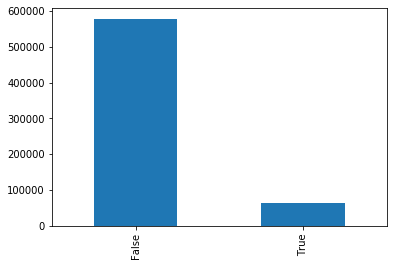

In [36]:
different_title.value_counts().plot(kind="bar")

**Exercise:** Display some random movies that have different original and primary titles.

In [40]:
%exercise

movie_titles[different_title].sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
185632,tt0196021,movie,Promise to the Unknown One,Promesse à l'inconnue,0,1942.0,NaN,90.0,None
1088321,tt3615424,movie,Toward Nowa Huta,Richtung Nowa Huta,0,2012.0,NaN,78.0,Documentary
46247,tt0047085,movie,High and Dry,The 'Maggie',0,1954.0,NaN,92.0,Comedy
465975,tt0494993,movie,Tarzan and the Magical Lamp,Tarzan Aur Jadui Chirag,0,1966.0,NaN,NaN,Adventure
40017,tt0040703,movie,Lost Daughter,Portrait from Life,0,1949.0,NaN,90.0,"Drama,Mystery,Thriller"
1031323,tt3212738,movie,Hostage,Jak jsme hráli cáru,0,2014.0,NaN,97.0,"Comedy,Drama,History"
60604,tt0062091,movie,The Dance of Death,Paarungen,0,1967.0,NaN,83.0,Drama
214598,tt0227707,movie,The Girls Aunt,La tía de las muchachas,0,1938.0,NaN,114.0,"Comedy,Drama"
593429,tt1209367,movie,The Swimsuit Issue,Allt flyter,0,2008.0,NaN,100.0,"Comedy,Drama"
830344,tt2035534,movie,"The Olympic Games at Athens, Greece",Jeux olympiques dAthènes,0,1906.0,NaN,NaN,"Documentary,Sport"


We may also want to get rid of wrong / incomplete data.

In [41]:
# Movies from the future?
imdb_titles[imdb_titles.startYear > 2019].startYear.value_counts()

2020.0    340
2021.0     36
2022.0     14
2024.0      2
2023.0      1
2115.0      1
2025.0      1
Name: startYear, dtype: int64

In [55]:
imdb_titles.dropna()[imdb_titles.startYear < 2020].sample(10)

/home/zhukovgreen/.cache/pypoetry/virtualenvs/np-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
980561,tt2832342,tvSeries,Whitlam: The Power and the Passion,Whitlam: The Power and the Passion,0,2013.0,2013.0,115.0,Documentary
350119,tt0372062,tvSeries,Gary the Rat,Gary the Rat,0,2003.0,2003.0,30.0,"Animation,Comedy,Fantasy"
1381202,tt5926494,tvSeries,Extinct,Extinct,0,2017.0,2017.0,52.0,"Action,Adventure,Drama"
491766,tt0829445,tvSeries,The Dude Martin Show,The Dude Martin Show,0,1949.0,1951.0,60.0,Music
1699873,tt8936586,tvMiniSeries,Joseph Plaut plaudert,Joseph Plaut plaudert,0,1963.0,1964.0,15.0,Family
1338084,tt5595034,tvSeries,Duay Rang Hang Rak,Duay Rang Hang Rak,0,2006.0,2007.0,90.0,Drama
1642537,tt8329360,tvSeries,"Vendredi, si ça me dit!","Vendredi, si ça me dit!",0,2008.0,2008.0,50.0,Talk-Show
779595,tt1835129,tvSeries,Death Valley,Death Valley,0,2011.0,2011.0,22.0,"Comedy,Horror"
97366,tt0101194,tvSeries,Second Thoughts,Second Thoughts,0,1991.0,1994.0,30.0,Comedy
1529232,tt7207472,tvSeries,Wambidgee,Wambidgee,0,1962.0,1962.0,7.0,"Animation,Drama,Fantasy"


In [80]:
imdb_titles[imdb_titles.startYear < 2020 & ~imdb_titles.startYear.isna()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


In [68]:
# Movies with startYear undefined
imdb_titles[imdb_titles.startYear.isna()].head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
44459,tt0045246,short,Torticola contre Frankensberg,Torticola contre Frankensberg,0,NaN,NaN,36.0,"Comedy,Sci-Fi,Short"
113817,tt0118530,movie,18,18,0,NaN,NaN,NaN,Romance
114229,tt0118981,movie,Dil Deewana Maane Na,Dil Deewana Maane Na,0,NaN,NaN,NaN,"Drama,Romance"
115677,tt0120589,movie,Arigo,Arigo,0,NaN,NaN,NaN,Drama
115916,tt0120892,movie,Winding Stair,Winding Stair,0,NaN,NaN,NaN,Thriller


**Exercise:** Use the `imdb_titles.startYear > 2019` filter and `dropna` method to get rid of rows with wrong / undefined years.

In [ ]:
%exercise

imdb_correct_titles = imdb_titles[___].dropna(subset=___)

In [ ]:
%validate

assert not (imdb_correct_titles.startYear > 2019).any()
assert not imdb_correct_titles.startYear.isna().any()
assert imdb_correct_titles.shape == (1694587, 9)

**Exercise:** Drop `titleType` and `endYear` columns and rows with `NaN` values (use `dropna`).

In [ ]:
%exercise

movie_titles = (movie_titles
                .drop(columns=___)
                .___
                )

In [ ]:
%validate

assert not any(result.isna().any())
assert sorted(result.columns) == ['genres', 'isAdult', 'originalTitle',  'primaryTitle', 
                                        'runtimeMinutes', 'startYear', 'tconst']

## Sorting

In [69]:
# Display 5 longest movies 
movie_titles.sort_values("runtimeMinutes", ascending=False).head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1637093,tt8273150,movie,Logistics,Logistics,0,2012.0,NaN,51420.0,Documentary
960463,tt2659636,movie,Modern Times Forever,Modern Times Forever,0,2011.0,NaN,14400.0,Documentary
913452,tt2355497,movie,Beijing 2003,Beijing 2003,0,2004.0,NaN,9000.0,Documentary
1559278,tt7492094,movie,Nari,Nari,0,2017.0,NaN,6017.0,Documentary
1272030,tt5068890,movie,Hunger!,Hunger!,0,2015.0,NaN,6000.0,"Documentary,Drama"


Hmm, let's look at *Modern Times Forever* - an apt title :)

In [70]:
IFrame(
    src="https://en.wikipedia.org/wiki/Modern_Times_Forever_(Stora_Enso_Building,_Helsinki)",
    width=900,
    height=400,
)

In [71]:
# Alternative
movie_titles.nlargest(5, "runtimeMinutes")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1637093,tt8273150,movie,Logistics,Logistics,0,2012.0,NaN,51420.0,Documentary
960463,tt2659636,movie,Modern Times Forever,Modern Times Forever,0,2011.0,NaN,14400.0,Documentary
913452,tt2355497,movie,Beijing 2003,Beijing 2003,0,2004.0,NaN,9000.0,Documentary
1559278,tt7492094,movie,Nari,Nari,0,2017.0,NaN,6017.0,Documentary
1272030,tt5068890,movie,Hunger!,Hunger!,0,2015.0,NaN,6000.0,"Documentary,Drama"


**Exercise:** Find the 10 oldest movies that are longer than 2 hours

In [ ]:
%exercise

result = movie_titles[___].___(___, ___)
result

In [ ]:
%validate

assert result.iloc[9]["startYear"] == 1914

In [72]:
movie_titles[(movie_titles["primaryTitle"].str.startswith("Indiana Jones")) & (movie_titles["titleType"] == "movie")]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
80173,tt0082971,movie,Indiana Jones and the Raiders of the Lost Ark,Raiders of the Lost Ark,0,1981.0,NaN,115.0,"Action,Adventure"
84429,tt0087469,movie,Indiana Jones and the Temple of Doom,Indiana Jones and the Temple of Doom,0,1984.0,NaN,118.0,"Action,Adventure"
93943,tt0097576,movie,Indiana Jones and the Last Crusade,Indiana Jones and the Last Crusade,0,1989.0,NaN,127.0,"Action,Adventure"
346174,tt0367882,movie,Indiana Jones and the Kingdom of the Crystal S...,Indiana Jones and the Kingdom of the Crystal S...,0,2008.0,NaN,122.0,"Action,Adventure"
538286,tt10075650,movie,Indiana Jones and the Sanctuary of the Black O...,Indiana Jones and the Sanctuary of the Black O...,0,2019.0,NaN,100.0,"Action,Adventure,Romance"
720746,tt1639457,movie,Indiana Jones und der Speer des Schicksals,Indiana Jones und der Speer des Schicksals,0,2010.0,NaN,66.0,"Action,Adventure"
1184334,tt4337946,movie,Indiana Jones and the Legend of Bimini,Indiana Jones and the Legend of Bimini,0,2014.0,NaN,65.0,Action
1194828,tt4432124,movie,Indiana Jones and the Secret of the Apalachee,Indiana Jones and the Secret of the Apalachee,0,2011.0,NaN,50.0,None
1516684,tt7097828,movie,Indiana Jones and the Chronicle of Peace,Indiana Jones and the Chronicle of Peace,0,NaN,NaN,NaN,"Action,Adventure"
1646583,tt8370876,movie,Indiana Jones and the Crown of Thorns,Indiana Jones and the Crown of Thorns,0,2018.0,NaN,54.0,Adventure


## Arithmetics and string manipulation

Standard **arithmetic operators** work on numerical columms too. And so do mathematical functions. Note all such operations are performed in a vector-like fashion.

In [73]:
movie_titles[["originalTitle", "startYear"]].assign(age = 2019 - movie_titles["startYear"]).sample(20)

,originalTitle,startYear,age
196616,Los desarraigados,1976.0,43.0
1400675,Casi leyendas,2017.0,2.0
569077,Mari 17,1990.0,29.0
960503,Gudu,2013.0,6.0
366156,Maze,1997.0,22.0
929464,Dømmer ikke,1919.0,100.0
288961,Portrait of God,2001.0,18.0
788039,Off Beat,2011.0,8.0
1616471,Let There Be Drums!,NaN,NaN
34935,We'll Meet Again,1943.0,76.0


**Exercise:** Calculate the length of movies in hours.

In [ ]:
%exercise

result = movie_titles[["originalTitle", "runtimeMinutes"]].assign(... = ...)
result.sample(10)

In [ ]:
%validate

assert result.iloc[0]["hours"] == 0.75

In [79]:
# If only the following had any sense!
np.sin(movie_titles["runtimeMinutes"]).sample(10)

1700440         NaN
447653     0.202150
1585833         NaN
1003092    0.994827
1518590         NaN
256635          NaN
16392      0.994827
581443     0.513978
805210          NaN
300175    -0.176076
Name: runtimeMinutes, dtype: float64

### Summary statistics

Note that the following methods return scalars

In [76]:
# Average length of the movies
movie_titles["runtimeMinutes"].mean()

85.29042253731454

In [77]:
# Standard deviation
movie_titles["runtimeMinutes"].std()

95.34197126375825

In [78]:
movie_titles["startYear"].max()

2115.0

**Exercise:** How many years would it take to watch all movies in the catalogue?

In [ ]:
%exercise
result = movie_titles["runtimeMinutes"] ...
result

In [75]:
%validate

assert np.round(result, 3) == 65.154

NameError: name 'result' is not defined

### Basic string operations

These are typically accessed using the `.str` "accessor" of the Series like this:
    
- series.str.lower
- series.str.split
- series.str.startswith
- series.str.contains
- ...

In [74]:
movie_titles[(movie_titles["primaryTitle"].str.startswith("Star Wars: Episode")) & (movie_titles["titleType"] == "movie")]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
74269,tt0076759,movie,Star Wars: Episode IV - A New Hope,Star Wars,0,1977.0,NaN,121.0,"Action,Adventure,Fantasy"
77992,tt0080684,movie,Star Wars: Episode V - The Empire Strikes Back,Star Wars: Episode V - The Empire Strikes Back,0,1980.0,NaN,124.0,"Action,Adventure,Fantasy"
83221,tt0086190,movie,Star Wars: Episode VI - Return of the Jedi,Star Wars: Episode VI - Return of the Jedi,0,1983.0,NaN,131.0,"Action,Adventure,Fantasy"
115929,tt0120915,movie,Star Wars: Episode I - The Phantom Menace,Star Wars: Episode I - The Phantom Menace,0,1999.0,NaN,136.0,"Action,Adventure,Fantasy"
116640,tt0121765,movie,Star Wars: Episode II - Attack of the Clones,Star Wars: Episode II - Attack of the Clones,0,2002.0,NaN,142.0,"Action,Adventure,Fantasy"
116641,tt0121766,movie,Star Wars: Episode III - Revenge of the Sith,Star Wars: Episode III - Revenge of the Sith,0,2005.0,NaN,140.0,"Action,Adventure,Fantasy"
938394,tt2488496,movie,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,0,2015.0,NaN,136.0,"Action,Adventure,Fantasy"
943257,tt2527336,movie,Star Wars: Episode VIII - The Last Jedi,Star Wars: Episode VIII - The Last Jedi,0,2017.0,NaN,152.0,"Action,Adventure,Fantasy"
943258,tt2527338,movie,Star Wars: Episode IX,Star Wars: Episode IX,0,2019.0,NaN,NaN,"Action,Adventure,Fantasy"
1654283,tt8452558,movie,Star Wars: Episode 1½: A Deadly Interception,Star Wars: Episode 1½: A Deadly Interception,0,2007.0,NaN,48.0,"Action,Adventure,Fantasy"


**Exercise:** Find all Pink Panther movies. Note that their title does not necessarily start with "Pink"

In [ ]:
%exercise

is_pink = ...
pink = movie_titles[is_pink]
pink

In [ ]:
%validate

assert pink.shape[0] == 14

In [ ]:
# String arithmetics work too!
url = "https://www.imdb.com/title/" + movie_titles["tconst"]
movie_titles[["primaryTitle"]].assign(url=url).sample(10)

Let's investigate the genres a bit:

In [ ]:
split_genres = movie_titles.genres.str.split(",").dropna()
split_genres.sample(10)

In [ ]:
genres = {genre for row in split_genres.iteritems() for genre in row[1]}

In [ ]:
genres

In [ ]:
# "One-hot" encoding of genres
movie_with_genres = movie_titles[['primaryTitle']].assign(
    **{genre : movie_titles.genres.str.contains(genre) * 1 for genre in genres}
)
movie_with_genres.sample(10)

In [ ]:
genre_counts = movie_with_genres[movie_with_genres == 1].iloc[:,1:].count()
genre_counts

In [ ]:
genre_counts.plot(kind="bar")

In [ ]:
movie_titles["startYear"].plot(kind="hist")

We see the one outlier and in general, the plots are not so nice. Being explicit sometimes helps.

In [ ]:
ax = movie_titles["startYear"].plot(kind="hist", bins=23, range=(1890, 2020))

No movies before 1900 / 1910? Really? Let's check:

In [ ]:
ax = movie_titles["startYear"].plot(kind="hist", bins=23, range=(1890, 2020))
ax.set_yscale("log")

**Exercise:** Plot a histogram of runtime minutes (limiting to a reasonable range).

In [ ]:
%exercise

movie_titles[___].plot(___)

In [ ]:
# Note: this is something that could be mor easily done with .groupby operation
average_genre_length = (movie_with_genres.iloc[:,1:].apply(lambda s: s * movie_titles["runtimeMinutes"])).sum() / genre_counts

In [ ]:
average_genre_length

**Exercise:** Sort the genres from the longest to shortest and visualize them using a bar plot.

In [ ]:
%exercise

___.___.plot(___)

**Exercise**: Find proper filters for the Lord of the Rings trilogy. Note that you will probably need to combine more conditions (multiple solutions possible).

In [ ]:
%exercise

is_lotr = ...
is_real_lotr = is_lotr & 

movie_titles[is_real_lotr]

**Exercise**: What is longer? The Lord of the Rings trilogy or The Hobbit "trilogy"?

Use the previous as a base to find the Hobbit movies. Then calculate the total length of each trio.

In [ ]:
%exercise

is_hobbit = ...
is_real_hobbit = ...

hobbit_length = ...
lotr_length = ...

print(f"The Hobbit length: {hobbit_length}, The Lord of the Rings length: {lotr_length}")

pd.concat([movie_titles[is_real_lotr], movie_titles[is_real_hobbit]]).sort_values("startYear")

In [ ]:
%validate

assert hobbit_length % 100 == 74
assert lotr_length // 100 == 5

**Exercise:** Find the movie with the (primary) longest title.

Hint: `idxmax()` method on the Series returns the index of the item with the maximum value. You can't (at least should) not use the maximum value itself.

In [81]:
imdb_titles.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [94]:
imdb_titles[imdb_titles["primaryTitle"].str.len() == imdb_titles["primaryTitle"].str.len().max()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1584230,tt7727908,video,Yufukuna kurashi kara gokuhin seikatsu e kyu t...,Yufukuna kurashi kara gokuhin seikatsu e kyu t...,1,2013.0,NaN,129.0,"Adult,Drama"


In [95]:
imdb_titles["primaryTitle"].str.len().max()

408

In [98]:
%exercise

longest_title_movie = imdb_titles[imdb_titles.primaryTitle.str.len().idxmax()]

print(longest_title_movie["primaryTitle"])

longest_title_movie

KeyError: 1584230

In [ ]:
%validate

assert longest_title_movie["primaryTitle"][2] == "s"